In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()


/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1224/2355357808.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,19,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
1,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,9,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Night
2,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,21,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
3,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,45,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Night
4,20243023,Qld,4,2024,Friday,01:00,Single,No,No,No,...,24,Outer Regional Australia,Cairns,Cairns,Local Road,No,No,17_to_25,Weekday,Night


In [3]:
data['Road User'].value_counts()

Driver                          25298
Passenger                       12790
Pedestrian                       8643
Motorcycle rider                 7279
Pedal cyclist                    1520
Motorcycle pillion passenger      381
Other/-9                          115
Name: Road User, dtype: int64

Optimized Code

00:12:38 - cmdstanpy - INFO - Chain [1] start processing
00:12:38 - cmdstanpy - INFO - Chain [1] done processing
00:12:38 - cmdstanpy - INFO - Chain [1] start processing
00:12:38 - cmdstanpy - INFO - Chain [1] done processing
00:12:39 - cmdstanpy - INFO - Chain [1] start processing
00:12:39 - cmdstanpy - INFO - Chain [1] done processing
00:12:39 - cmdstanpy - INFO - Chain [1] start processing
00:12:39 - cmdstanpy - INFO - Chain [1] done processing
00:12:39 - cmdstanpy - INFO - Chain [1] start processing
00:12:39 - cmdstanpy - INFO - Chain [1] done processing
00:12:39 - cmdstanpy - INFO - Chain [1] start processing
00:12:39 - cmdstanpy - INFO - Chain [1] done processing
00:12:39 - cmdstanpy - INFO - Chain [1] start processing
00:12:40 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - Road User:
Driver - MAE: 7.92, MSE: 80.69, MAPE: 15.54%
Forecast vs Actual for first three months of 2024 for Driver:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  40.446664   23.847149   56.727957
421 2024-02-01  38.447444   20.213608   55.587000
422 2024-03-01  49.920106   33.481041   67.437598
        Date  Counts
0 2024-01-01      50
1 2024-02-01      42
2 2024-03-01      47

Forecast for Driver in 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  35.800644   18.698576   52.844836
494 2030-02-28  46.717907   29.821064   63.398174
495 2030-03-31  29.662273   12.092785   47.412690
496 2030-04-30  51.544899   34.475290   69.085305
497 2030-05-31  47.905521   29.785395   64.833624
498 2030-06-30  34.791974   17.991659   50.412756
499 2030-07-31  40.439979   23.960740   56.798783
500 2030-08-31  45.457257   29.382042   62.362259
501 2030-09-30  42.796939   26.529868   58.557366
502 2030-10-31  49.4

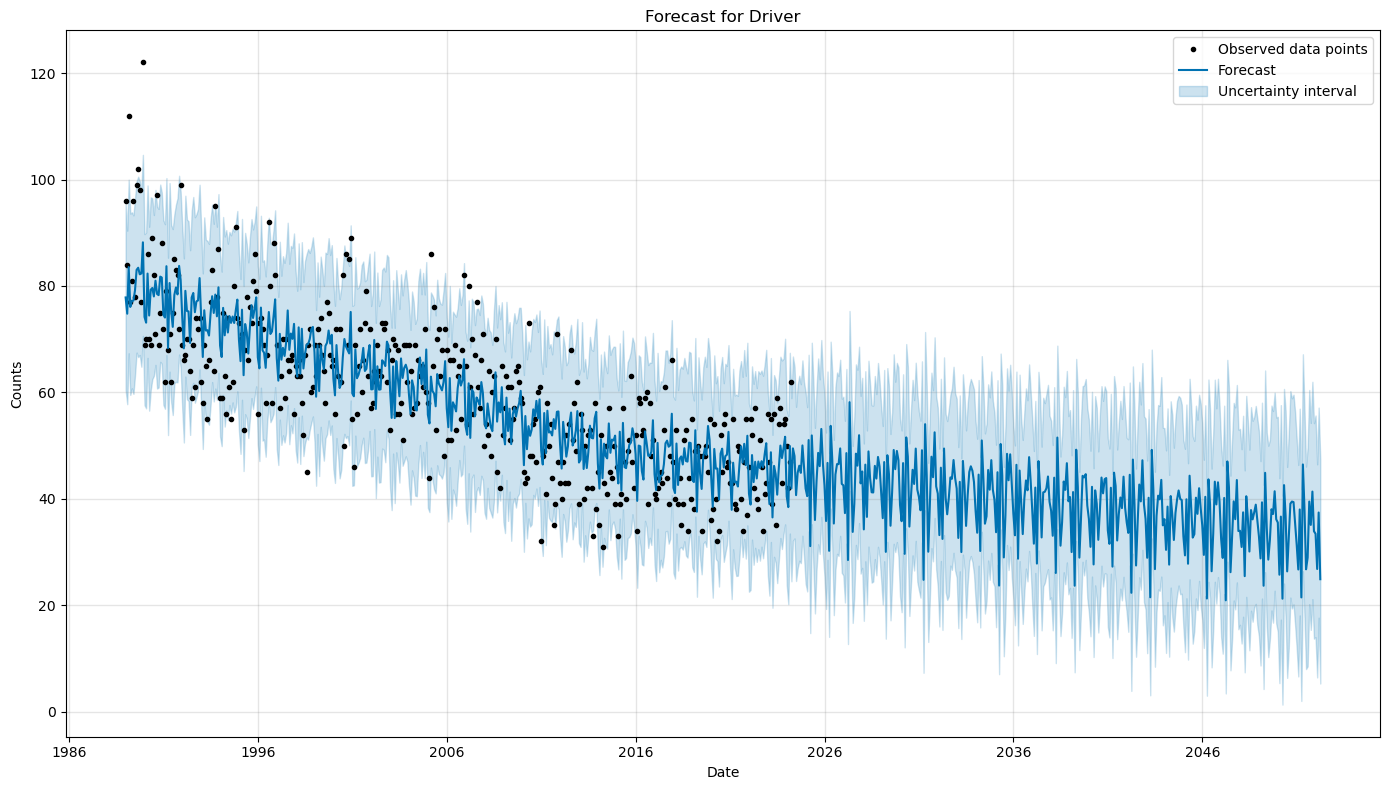

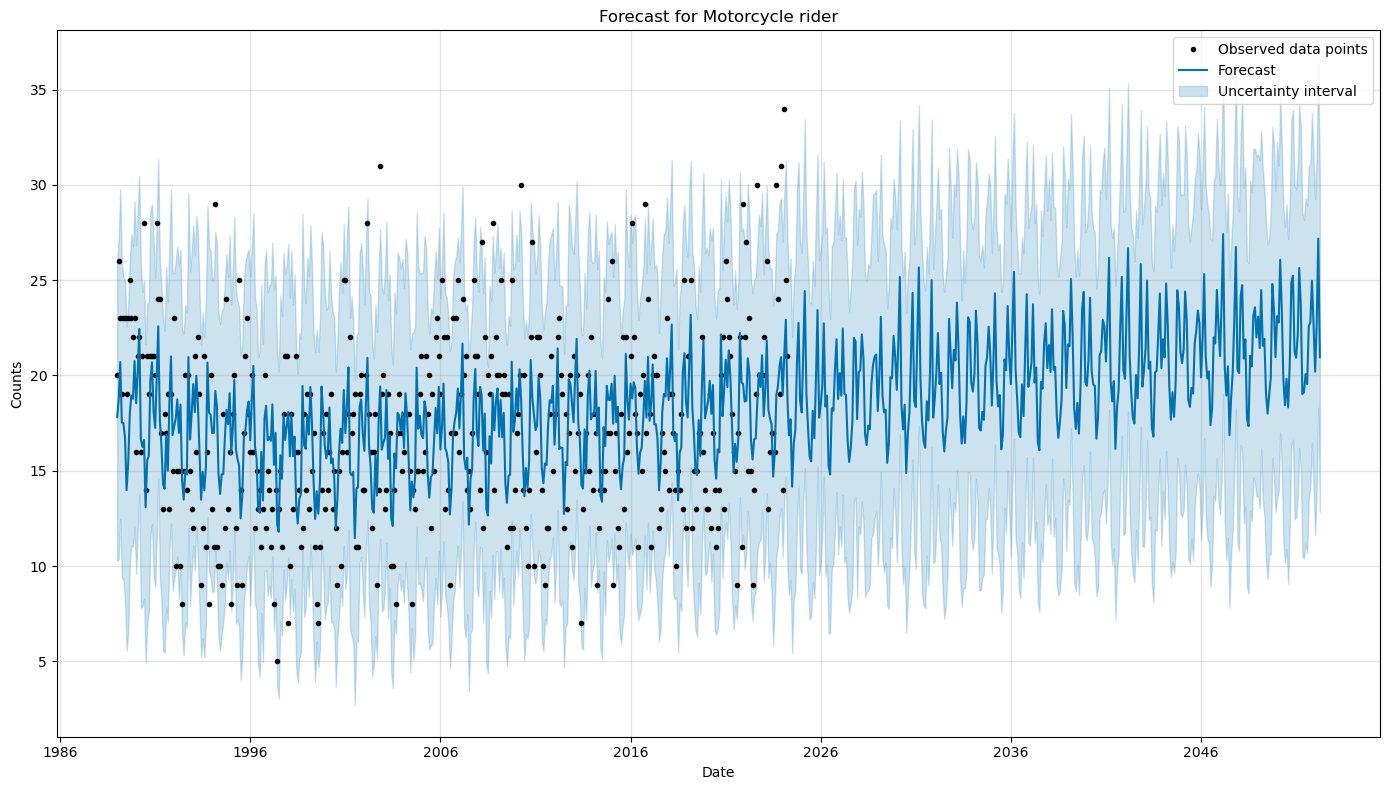

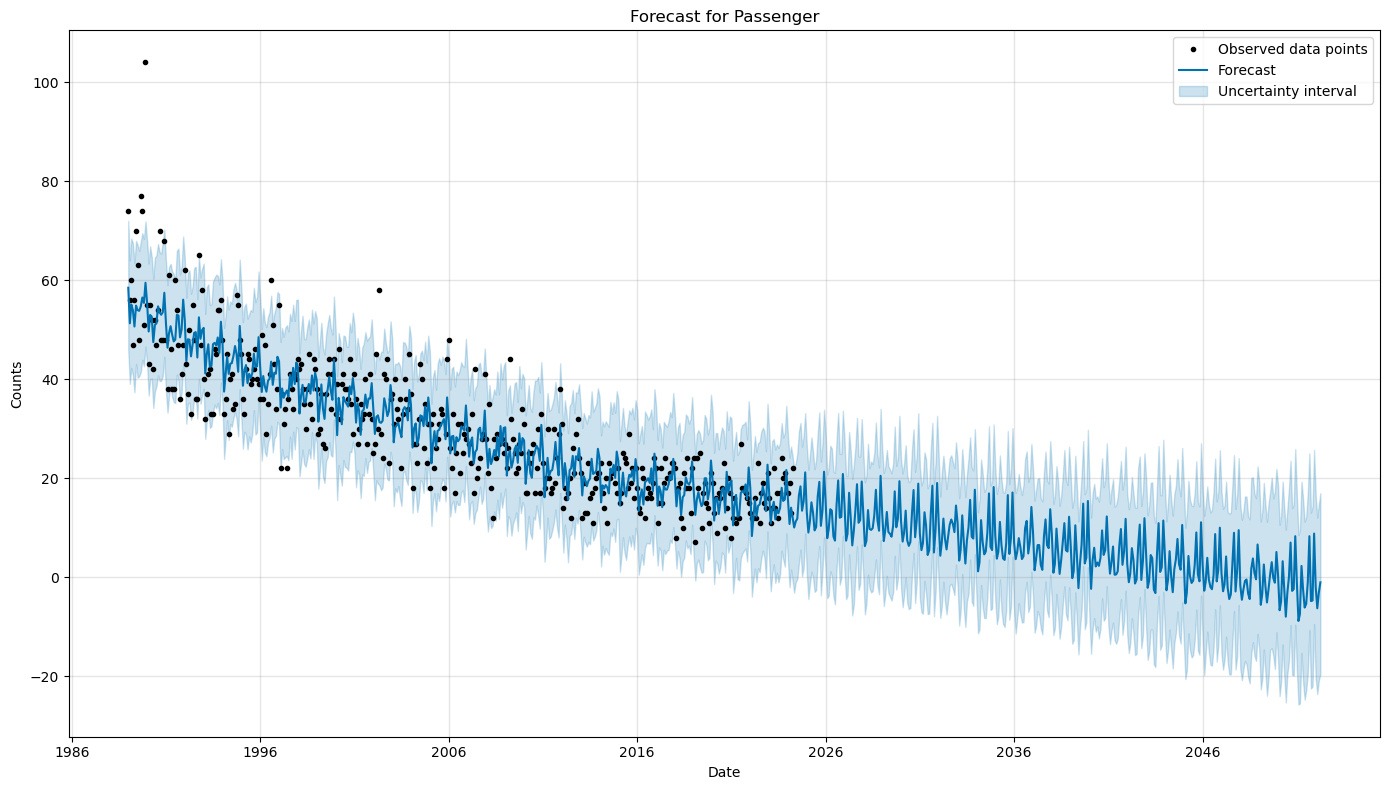

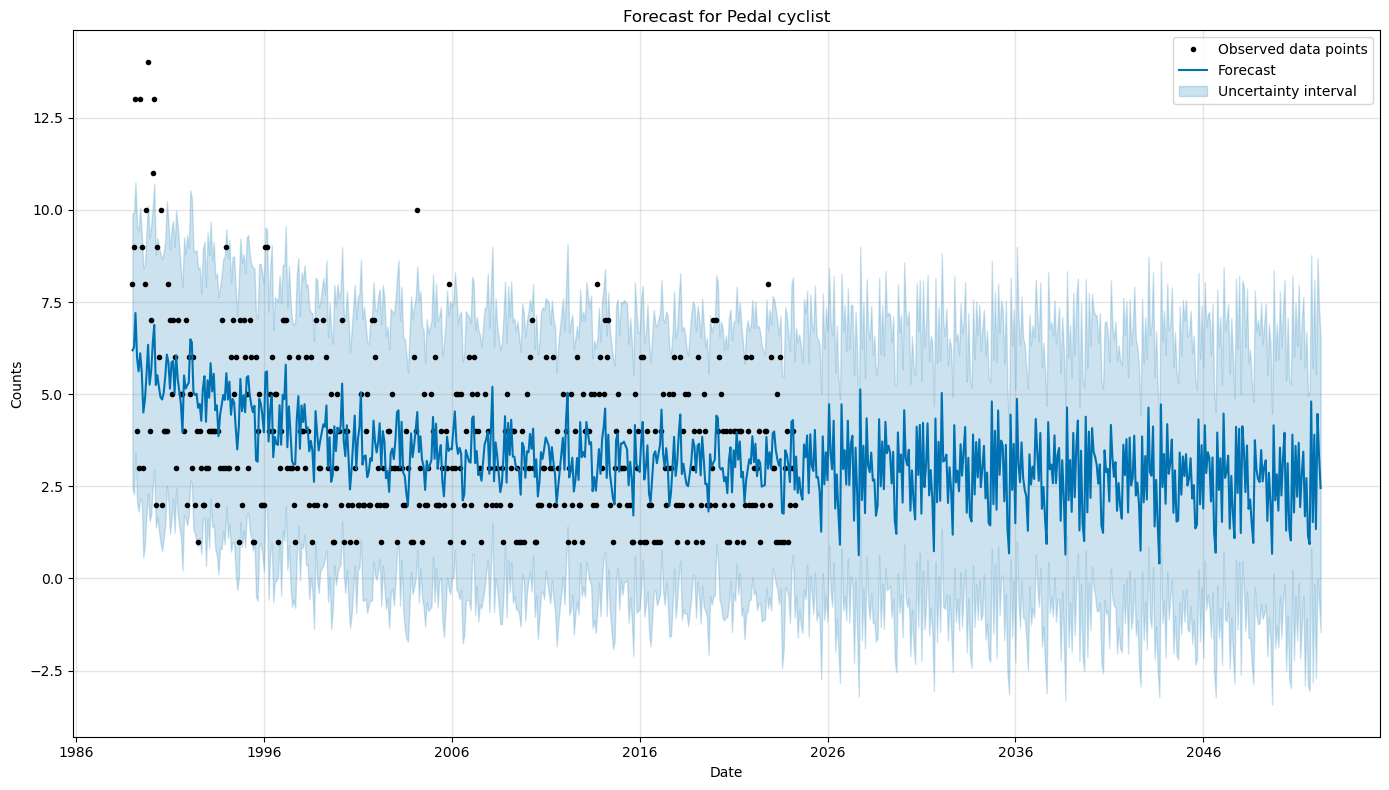

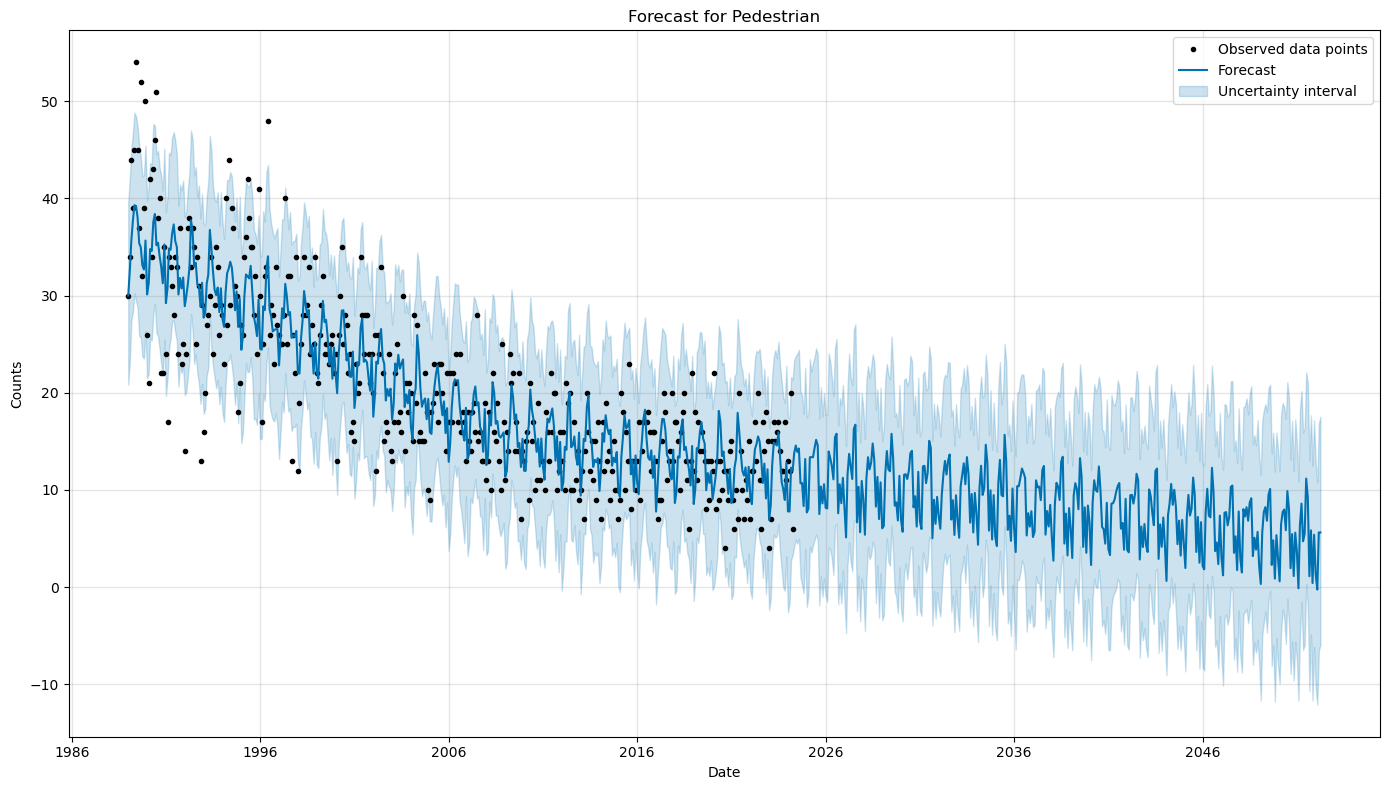

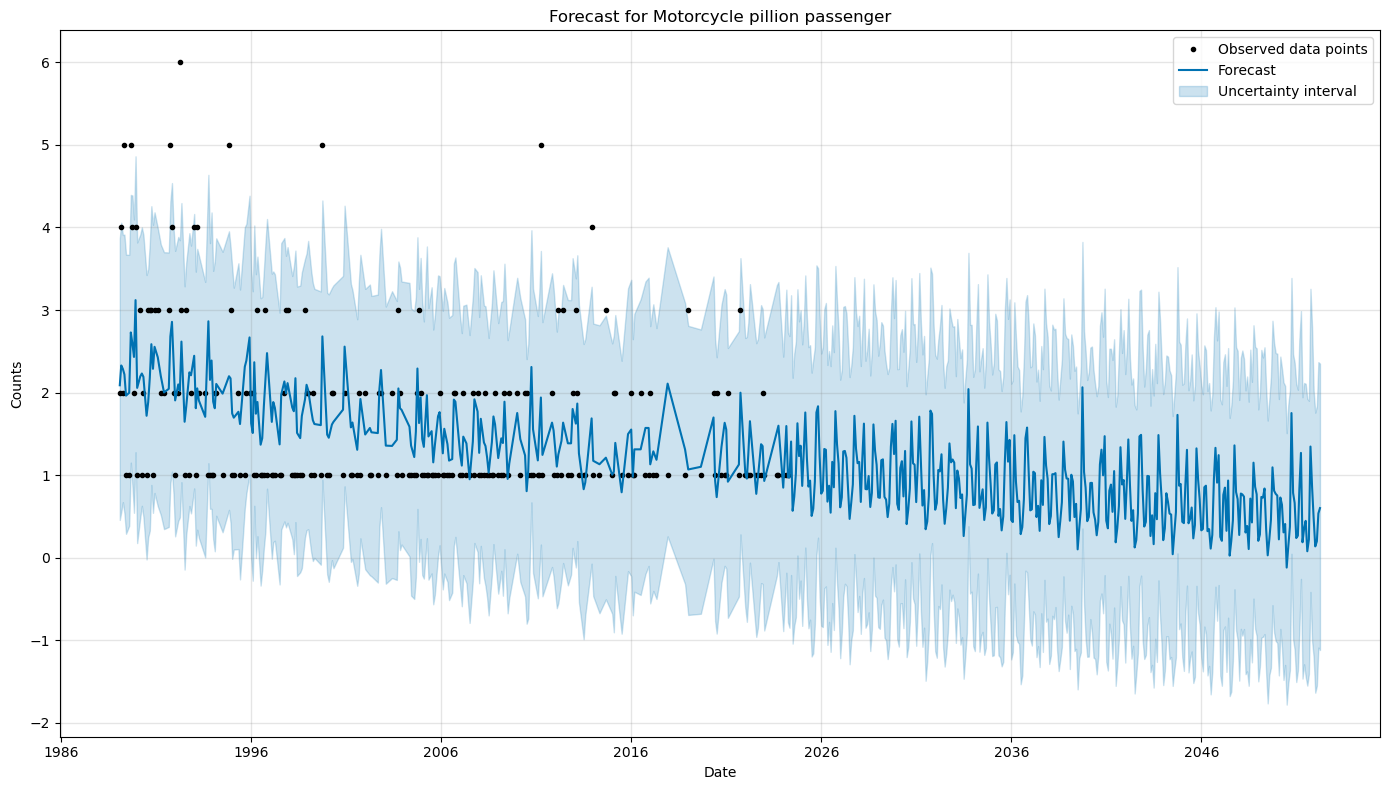

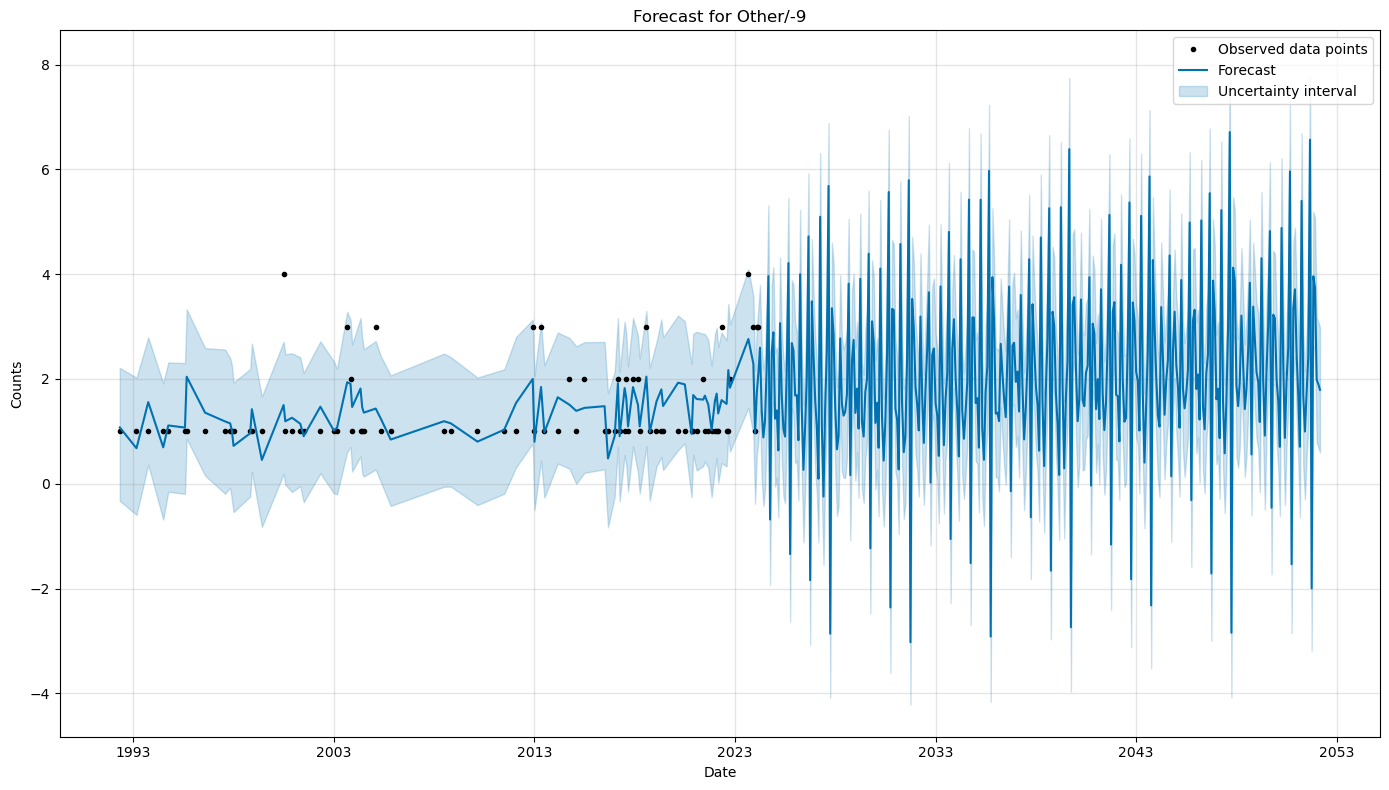

Dickey-Fuller Test Results:

Time of day: Driver
ADF Statistic: -2.2533155542479
p-value: 0.1874667307262447
Critical Value 1%: -3.446479704252724
Critical Value 5%: -2.8686500930967354
Critical Value 10%: -2.5705574627547096

Time of day: Motorcycle rider
ADF Statistic: -2.5363270514059635
p-value: 0.10688384703310871
Critical Value 1%: -3.4463612216221775
Critical Value 5%: -2.8685980017932917
Critical Value 10%: -2.5705296947685605

Time of day: Passenger
ADF Statistic: -3.4416767836651365
p-value: 0.009617552968270977
Critical Value 1%: -3.4464400156784927
Critical Value 5%: -2.868632644097719
Critical Value 10%: -2.5705481612974577

Time of day: Pedal cyclist
ADF Statistic: -4.372581165898739
p-value: 0.0003318136596567217
Critical Value 1%: -3.447099431978147
Critical Value 5%: -2.8689225261604263
Critical Value 10%: -2.57070269105012

Time of day: Pedestrian
ADF Statistic: -2.9810564089842733
p-value: 0.036701765440848876
Critical Value 1%: -3.4463612216221775
Critical Value 5%:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive')
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'Road User'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])
    #r2 = r2_score(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()

# Plot the forecasts in separate figures
for value, forecast in forecasts.items():
    fig, ax = plt.subplots(figsize=(14, 8))
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
   
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\nTime of day: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")
